In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.16.2
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('UCI-HAR Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

UCI-HAR Dataset/.DS_Store
UCI-HAR Dataset/features.txt
UCI-HAR Dataset/activity_labels.txt
UCI-HAR Dataset/features_info.txt
UCI-HAR Dataset/README.txt
UCI-HAR Dataset/test/subject_test.txt
UCI-HAR Dataset/test/X_test.txt
UCI-HAR Dataset/test/y_test.txt
UCI-HAR Dataset/test/Inertial Signals/total_acc_y_test.txt
UCI-HAR Dataset/test/Inertial Signals/total_acc_x_test.txt
UCI-HAR Dataset/test/Inertial Signals/body_acc_x_test.txt
UCI-HAR Dataset/test/Inertial Signals/body_acc_y_test.txt
UCI-HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt
UCI-HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt
UCI-HAR Dataset/test/Inertial Signals/total_acc_z_test.txt
UCI-HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt
UCI-HAR Dataset/test/Inertial Signals/body_acc_z_test.txt
UCI-HAR Dataset/train/X_train.txt
UCI-HAR Dataset/train/y_train.txt
UCI-HAR Dataset/train/subject_train.txt
UCI-HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt
UCI-HAR Dataset/train/Inertial Signals/body_acc_y

In [3]:
# Train data
body_acc_x_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', delim_whitespace=True, header=None)
body_acc_y_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', delim_whitespace=True, header=None)
body_acc_z_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/body_acc_z_train.txt', delim_whitespace=True, header=None)
body_gyro_x_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', delim_whitespace=True, header=None)
body_gyro_y_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt', delim_whitespace=True, header=None)
body_gyro_z_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt', delim_whitespace=True, header=None)
total_acc_x_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
total_acc_y_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
total_acc_z_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)

# Test data
body_acc_x_test = pd.read_csv('UCI-HAR Dataset/test/Inertial Signals/body_acc_x_test.txt', delim_whitespace=True, header=None)
body_acc_y_test = pd.read_csv('UCI-HAR Dataset/test/Inertial Signals/body_acc_y_test.txt', delim_whitespace=True, header=None)
body_acc_z_test = pd.read_csv('UCI-HAR Dataset/test/Inertial Signals/body_acc_z_test.txt', delim_whitespace=True, header=None)
body_gyro_x_test = pd.read_csv('UCI-HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt', delim_whitespace=True, header=None)
body_gyro_y_test = pd.read_csv('UCI-HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt', delim_whitespace=True, header=None)
body_gyro_z_test = pd.read_csv('UCI-HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt', delim_whitespace=True, header=None)
total_acc_x_test = pd.read_csv('UCI-HAR Dataset/test/Inertial Signals/total_acc_x_test.txt', delim_whitespace=True, header=None)
total_acc_y_test = pd.read_csv('UCI-HAR Dataset/test/Inertial Signals/total_acc_y_test.txt', delim_whitespace=True, header=None)
total_acc_z_test = pd.read_csv('UCI-HAR Dataset/test/Inertial Signals/total_acc_z_test.txt', delim_whitespace=True, header=None)

/var/folders/p3/nztkj0p504z32rp7hy7rn3900000gn/T/ipykernel_14267/2055133109.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  body_acc_x_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', delim_whitespace=True, header=None)
/var/folders/p3/nztkj0p504z32rp7hy7rn3900000gn/T/ipykernel_14267/2055133109.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  body_acc_y_train = pd.read_csv('UCI-HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', delim_whitespace=True, header=None)
/var/folders/p3/nztkj0p504z32rp7hy7rn3900000gn/T/ipykernel_14267/2055133109.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  body_acc_z_train = pd.read_csv('UCI-HAR Dataset/train/Inertial

In [4]:
body_gyro_x_train.sample()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1558,0.423949,0.045786,0.071127,0.200703,0.386638,0.451508,0.284456,0.304805,0.412029,0.422956,...,-1.315113,-0.740153,0.114608,0.572634,0.846498,0.821574,0.295917,-0.303032,-0.634281,-0.626


In [5]:
total_acc_z_test.sample()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
2901,0.033502,0.055051,-0.041082,-0.259586,-0.430842,-0.414816,-0.247222,-0.136401,-0.332969,-0.599216,...,0.001636,-0.016346,-0.027005,-0.082551,-0.077577,-0.055674,-0.067647,-0.063225,-0.054774,-0.051674


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
body_acc_x_train_reduce = pd.DataFrame(pca.fit_transform(body_acc_x_train))
body_acc_x_test_reduce = pd.DataFrame(pca.transform(body_acc_x_test))

body_acc_y_train_reduce = pd.DataFrame(pca.fit_transform(body_acc_y_train))
body_acc_y_test_reduce = pd.DataFrame(pca.transform(body_acc_y_test))

body_acc_z_train_reduce = pd.DataFrame(pca.fit_transform(body_acc_z_train))
body_acc_z_test_reduce = pd.DataFrame(pca.transform(body_acc_z_test))

body_gyro_x_train_reduce = pd.DataFrame(pca.fit_transform(body_gyro_x_train))
body_gyro_x_test_reduce = pd.DataFrame(pca.transform(body_gyro_x_test))

body_gyro_y_train_reduce = pd.DataFrame(pca.fit_transform(body_gyro_y_train))
body_gyro_y_test_reduce = pd.DataFrame(pca.transform(body_gyro_y_test))

body_gyro_z_train_reduce = pd.DataFrame(pca.fit_transform(body_gyro_z_train))
body_gyro_z_test_reduce = pd.DataFrame(pca.transform(body_gyro_z_test))

total_acc_x_train_reduce = pd.DataFrame(pca.fit_transform(total_acc_x_train))
total_acc_x_test_reduce = pd.DataFrame(pca.transform(total_acc_x_test))

total_acc_y_train_reduce = pd.DataFrame(pca.fit_transform(total_acc_y_train))
total_acc_y_test_reduce = pd.DataFrame(pca.transform(total_acc_y_test))

total_acc_z_train_reduce = pd.DataFrame(pca.fit_transform(total_acc_z_train))
total_acc_z_test_reduce = pd.DataFrame(pca.transform(total_acc_z_test))

body_acc_x_train_reduce.shape

(7352, 27)

In [7]:
import numpy as np

def mad(data):
    return np.mean(np.abs(data - np.mean(data)))

pca_new = pd.DataFrame(body_acc_x_train_reduce.mean(axis=1))
pca_new.columns = ['tBodyAcc-mean()-x']
pca_new['tBodyAcc-mean()-y'] = body_acc_y_train_reduce.mean(axis=1)
pca_new['tBodyAcc-mean()-z'] = body_acc_z_train_reduce.mean(axis=1)
pca_new['tBodyGyro-mean()-x'] = body_gyro_x_train_reduce.mean(axis=1)
pca_new['tBodyGyro-mean()-y'] = body_gyro_y_train_reduce.mean(axis=1)
pca_new['tBodyGyro-mean()-z'] = body_gyro_z_train_reduce.mean(axis=1)
pca_new['tTotalAcc-mean()-x'] = total_acc_x_train_reduce.mean(axis=1)
pca_new['tTotalAcc-mean()-y'] = total_acc_y_train_reduce.mean(axis=1)
pca_new['tTotalAcc-mean()-z'] = total_acc_z_train_reduce.mean(axis=1)

pca_new['tBodyAcc-std()-x'] = body_acc_x_train_reduce.std(axis=1)
pca_new['tBodyAcc-std()-y'] = body_acc_y_train_reduce.std(axis=1)
pca_new['tBodyAcc-std()-z'] = body_acc_z_train_reduce.std(axis=1)
pca_new['tBodyGyro-std()-x'] = body_gyro_x_train_reduce.std(axis=1)
pca_new['tBodyGyro-std()-y'] = body_gyro_y_train_reduce.std(axis=1)
pca_new['tBodyGyro-std()-z'] = body_gyro_z_train_reduce.std(axis=1)
pca_new['tTotalAcc-std()-x'] = total_acc_x_train_reduce.std(axis=1)
# Removed tTotalAcc-std()-y and tTotalAcc-std()-z as they were resulting in NaN values

pca_new['tBodyAcc-mad()-x'] = body_acc_x_train_reduce.apply(mad, axis=1)
pca_new['tBodyAcc-mad()-y'] = body_acc_y_train_reduce.apply(mad, axis=1)
pca_new['tBodyAcc-mad()-z'] = body_acc_z_train_reduce.apply(mad, axis=1)
pca_new['tBodyGyro-mad()-x'] = body_gyro_x_train_reduce.apply(mad, axis=1)
pca_new['tBodyGyro-mad()-y'] = body_gyro_y_train_reduce.apply(mad, axis=1)
pca_new['tBodyGyro-mad()-z'] = body_gyro_z_train_reduce.apply(mad, axis=1)
pca_new['tTotalAcc-mad()-x'] = total_acc_x_train_reduce.apply(mad, axis=1)
# Removed tTotalAcc-mad()-y and tTotalAcc-mad()-z as they were resulting in all zeros

pca_new['tBodyAcc-max()-x'] = body_acc_x_train_reduce.max(axis=1)
pca_new['tBodyAcc-max()-y'] = body_acc_y_train_reduce.max(axis=1)
pca_new['tBodyAcc-max()-z'] = body_acc_z_train_reduce.max(axis=1)
pca_new['tBodyGyro-max()-x'] = body_gyro_x_train_reduce.max(axis=1)
pca_new['tBodyGyro-max()-y'] = body_gyro_y_train_reduce.max(axis=1)
pca_new['tBodyGyro-max()-z'] = body_gyro_z_train_reduce.max(axis=1)
pca_new['tTotalAcc-max()-x'] = total_acc_x_train_reduce.max(axis=1)
pca_new['tTotalAcc-max()-y'] = total_acc_y_train_reduce.max(axis=1)
pca_new['tTotalAcc-max()-z'] = total_acc_z_train_reduce.max(axis=1)

pca_new['tBodyAcc-min()-x'] = body_acc_x_train_reduce.min(axis=1)
pca_new['tBodyAcc-min()-y'] = body_acc_y_train_reduce.min(axis=1)
pca_new['tBodyAcc-min()-z'] = body_acc_z_train_reduce.min(axis=1)
pca_new['tBodyGyro-min()-x'] = body_gyro_x_train_reduce.min(axis=1)
pca_new['tBodyGyro-min()-y'] = body_gyro_y_train_reduce.min(axis=1)
pca_new['tBodyGyro-min()-z'] = body_gyro_z_train_reduce.min(axis=1)
pca_new['tTotalAcc-min()-x'] = total_acc_x_train_reduce.min(axis=1)
pca_new['tTotalAcc-min()-y'] = total_acc_y_train_reduce.min(axis=1)
pca_new['tTotalAcc-min()-z'] = total_acc_z_train_reduce.min(axis=1)

pca_new['tBodyAcc-median()-x'] = body_acc_x_train_reduce.median(axis=1)
pca_new['tBodyAcc-median()-y'] = body_acc_y_train_reduce.median(axis=1)
pca_new['tBodyAcc-median()-z'] = body_acc_z_train_reduce.median(axis=1)
pca_new['tBodyGyro-median()-x'] = body_gyro_x_train_reduce.median(axis=1)
pca_new['tBodyGyro-median()-y'] = body_gyro_y_train_reduce.median(axis=1)
pca_new['tBodyGyro-median()-z'] = body_gyro_z_train_reduce.median(axis=1)
pca_new['tTotalAcc-median()-x'] = total_acc_x_train_reduce.median(axis=1)
pca_new['tTotalAcc-median()-y'] = total_acc_y_train_reduce.median(axis=1)
pca_new['tTotalAcc-median()-z'] = total_acc_z_train_reduce.median(axis=1)

In [8]:
def mad(data):
    return np.mean(np.abs(data - np.mean(data)))

test_pca_new = pd.DataFrame(body_acc_x_test_reduce.mean(axis=1))
test_pca_new.columns = ['tBodyAcc-mean()-x']
test_pca_new['tBodyAcc-mean()-y'] = body_acc_y_test_reduce.mean(axis=1)
test_pca_new['tBodyAcc-mean()-z'] = body_acc_z_test_reduce.mean(axis=1)
test_pca_new['tBodyGyro-mean()-x'] = body_gyro_x_test_reduce.mean(axis=1)
test_pca_new['tBodyGyro-mean()-y'] = body_gyro_y_test_reduce.mean(axis=1)
test_pca_new['tBodyGyro-mean()-z'] = body_gyro_z_test_reduce.mean(axis=1)
test_pca_new['tTotalAcc-mean()-x'] = total_acc_x_test_reduce.mean(axis=1)
test_pca_new['tTotalAcc-mean()-y'] = total_acc_y_test_reduce.mean(axis=1)
test_pca_new['tTotalAcc-mean()-z'] = total_acc_z_test_reduce.mean(axis=1)

test_pca_new['tBodyAcc-std()-x'] = body_acc_x_test_reduce.std(axis=1)
test_pca_new['tBodyAcc-std()-y'] = body_acc_y_test_reduce.std(axis=1)
test_pca_new['tBodyAcc-std()-z'] = body_acc_z_test_reduce.std(axis=1)
test_pca_new['tBodyGyro-std()-x'] = body_gyro_x_test_reduce.std(axis=1)
test_pca_new['tBodyGyro-std()-y'] = body_gyro_y_test_reduce.std(axis=1)
test_pca_new['tBodyGyro-std()-z'] = body_gyro_z_test_reduce.std(axis=1)
test_pca_new['tTotalAcc-std()-x'] = total_acc_x_test_reduce.std(axis=1)

test_pca_new['tBodyAcc-mad()-x'] = body_acc_x_test_reduce.apply(mad, axis=1)
test_pca_new['tBodyAcc-mad()-y'] = body_acc_y_test_reduce.apply(mad, axis=1)
test_pca_new['tBodyAcc-mad()-z'] = body_acc_z_test_reduce.apply(mad, axis=1)
test_pca_new['tBodyGyro-mad()-x'] = body_gyro_x_test_reduce.apply(mad, axis=1)
test_pca_new['tBodyGyro-mad()-y'] = body_gyro_y_test_reduce.apply(mad, axis=1)
test_pca_new['tBodyGyro-mad()-z'] = body_gyro_z_test_reduce.apply(mad, axis=1)
test_pca_new['tTotalAcc-mad()-x'] = total_acc_x_test_reduce.apply(mad, axis=1)

test_pca_new['tBodyAcc-max()-x'] = body_acc_x_test_reduce.max(axis=1)
test_pca_new['tBodyAcc-max()-y'] = body_acc_y_test_reduce.max(axis=1)
test_pca_new['tBodyAcc-max()-z'] = body_acc_z_test_reduce.max(axis=1)
test_pca_new['tBodyGyro-max()-x'] = body_gyro_x_test_reduce.max(axis=1)
test_pca_new['tBodyGyro-max()-y'] = body_gyro_y_test_reduce.max(axis=1)
test_pca_new['tBodyGyro-max()-z'] = body_gyro_z_test_reduce.max(axis=1)
test_pca_new['tTotalAcc-max()-x'] = total_acc_x_test_reduce.max(axis=1)
test_pca_new['tTotalAcc-max()-y'] = total_acc_y_test_reduce.max(axis=1)
test_pca_new['tTotalAcc-max()-z'] = total_acc_z_test_reduce.max(axis=1)

test_pca_new['tBodyAcc-min()-x'] = body_acc_x_test_reduce.min(axis=1)
test_pca_new['tBodyAcc-min()-y'] = body_acc_y_test_reduce.min(axis=1)
test_pca_new['tBodyAcc-min()-z'] = body_acc_z_test_reduce.min(axis=1)
test_pca_new['tBodyGyro-min()-x'] = body_gyro_x_test_reduce.min(axis=1)
test_pca_new['tBodyGyro-min()-y'] = body_gyro_y_test_reduce.min(axis=1)
test_pca_new['tBodyGyro-min()-z'] = body_gyro_z_test_reduce.min(axis=1)
test_pca_new['tTotalAcc-min()-x'] = total_acc_x_test_reduce.min(axis=1)
test_pca_new['tTotalAcc-min()-y'] = total_acc_y_test_reduce.min(axis=1)
test_pca_new['tTotalAcc-min()-z'] = total_acc_z_test_reduce.min(axis=1)

test_pca_new['tBodyAcc-median()-x'] = body_acc_x_test_reduce.median(axis=1)
test_pca_new['tBodyAcc-median()-y'] = body_acc_y_test_reduce.median(axis=1)
test_pca_new['tBodyAcc-median()-z'] = body_acc_z_test_reduce.median(axis=1)
test_pca_new['tBodyGyro-median()-x'] = body_gyro_x_test_reduce.median(axis=1)
test_pca_new['tBodyGyro-median()-y'] = body_gyro_y_test_reduce.median(axis=1)
test_pca_new['tBodyGyro-median()-z'] = body_gyro_z_test_reduce.median(axis=1)
test_pca_new['tTotalAcc-median()-x'] = total_acc_x_test_reduce.median(axis=1)
test_pca_new['tTotalAcc-median()-y'] = total_acc_y_test_reduce.median(axis=1)
test_pca_new['tTotalAcc-median()-z'] = total_acc_z_test_reduce.median(axis=1)


In [69]:
print(pca_new.shape)
print(test_pca_new.shape)

(7352, 50)
(2947, 50)


In [70]:
pd.isna(pca_new).sum()

tBodyAcc-mean()-x       0
tBodyAcc-mean()-y       0
tBodyAcc-mean()-z       0
tBodyGyro-mean()-x      0
tBodyGyro-mean()-y      0
tBodyGyro-mean()-z      0
tTotalAcc-mean()-x      0
tTotalAcc-mean()-y      0
tTotalAcc-mean()-z      0
tBodyAcc-std()-x        0
tBodyAcc-std()-y        0
tBodyAcc-std()-z        0
tBodyGyro-std()-x       0
tBodyGyro-std()-y       0
tBodyGyro-std()-z       0
tTotalAcc-std()-x       0
tBodyAcc-mad()-x        0
tBodyAcc-mad()-y        0
tBodyAcc-mad()-z        0
tBodyGyro-mad()-x       0
tBodyGyro-mad()-y       0
tBodyGyro-mad()-z       0
tTotalAcc-mad()-x       0
tBodyAcc-max()-x        0
tBodyAcc-max()-y        0
tBodyAcc-max()-z        0
tBodyGyro-max()-x       0
tBodyGyro-max()-y       0
tBodyGyro-max()-z       0
tTotalAcc-max()-x       0
tTotalAcc-max()-y       0
tTotalAcc-max()-z       0
tBodyAcc-min()-x        0
tBodyAcc-min()-y        0
tBodyAcc-min()-z        0
tBodyGyro-min()-x       0
tBodyGyro-min()-y       0
tBodyGyro-min()-z       0
tTotalAcc-mi

In [71]:
y_train = pd.read_csv('UCI-HAR Dataset/train/y_train.txt', header=None)
y_train = pd.DataFrame(y_train)

In [72]:
y_train.columns = ['label']
y_train = pd.get_dummies(y_train['label'])
y_train.head()

,1,2,3,4,5,6
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


In [73]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(pca_new,y_train,test_size=0.3,random_state=42)

In [74]:
X_train = X_train.values.reshape(5146, 50, 1)
X_valid = X_valid.values.reshape(2206, 50, 1)
test_pca_new = test_pca_new.values.reshape(2947, 50, 1)
print(X_train.shape)
print(y_train.shape)

(5146, 50, 1)
(5146, 6)


loss:nan이 나올때 참고: https://datascience.stackexchange.com/questions/68331/keras-sequential-model-returns-loss-nan

In [75]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras import initializers

model = Sequential()
model.add(LSTM(64, recurrent_regularizer=l2(0.8), 
                bias_initializer='zeros',
               input_shape=(50, 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32,input_shape=(50, 1), return_sequences=True))

model.add(LSTM(28,input_shape=(50, 1), recurrent_regularizer=l2(0.5), return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(25,input_shape=(50, 1)))
model.add(Dense(6, activation='softmax')) # output = 6

adamax = optimizers.Adamax(learning_rate=0.001, clipnorm=1.0)
model.compile(loss='categorical_crossentropy', optimizer=adamax, metrics=['accuracy'])
model.summary()

/Users/roshank/PycharmProjects/IITGNSelectionTask-1/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 50, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 50, 28)         │         6,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 25)             │         5,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,700 (162.89 KB)

 Trainable params: 41,700 (162.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3764 - loss: 53.8668 - val_accuracy: 0.4383 - val_loss: 24.7265
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5265 - loss: 19.4374 - val_accuracy: 0.6142 - val_loss: 8.1938
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6407 - loss: 6.3900 - val_accuracy: 0.6546 - val_loss: 2.7654
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6760 - loss: 2.2589 - val_accuracy: 0.7085 - val_loss: 1.2198
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7012 - loss: 1.1125 - val_accuracy: 0.7153 - val_loss: 0.8404
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7139 - loss: 0.8310 - val_accuracy: 0.7189 - val_loss: 0.7210
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7218 - loss: 0.7125 - val_accuracy: 0.7425 - val_loss: 0.6612
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7332 - loss: 0.6666 - val_accuracy:

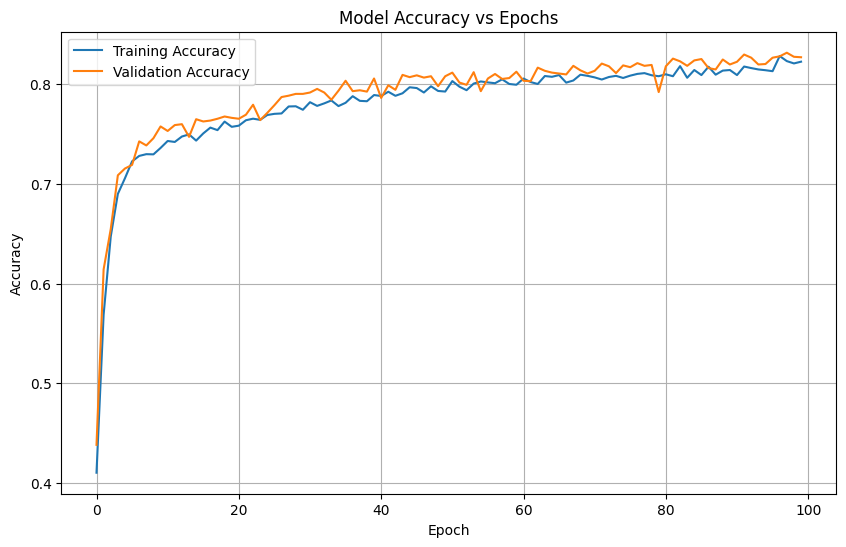

In [76]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    batch_size=128, verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
y_pred_test = model.predict(test_pca_new)
print(y_pred_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[[2.6927009e-04 2.3172412e-04 3.6472743e-04 1.8981405e-01 8.0881637e-01
  5.0386658e-04]
 [2.6721024e-04 2.2971958e-04 3.6377655e-04 1.8886249e-01 8.0977625e-01
  5.0064328e-04]
 [2.6671815e-04 2.2917846e-04 3.6295256e-04 1.8864992e-01 8.0999190e-01
  4.9929309e-04]
 ...
 [5.0182134e-01 4.6294805e-01 3.2410737e-02 3.3675059e-04 2.3898412e-03
  9.3326154e-05]
 [7.1206975e-01 2.6174656e-01 2.2508999e-02 5.3617085e-04 3.0814160e-03
  5.7158159e-05]
 [7.2001725e-01 2.5571114e-01 2.0449985e-02 5.7289848e-04 3.1898192e-03
  5.8937214e-05]]


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


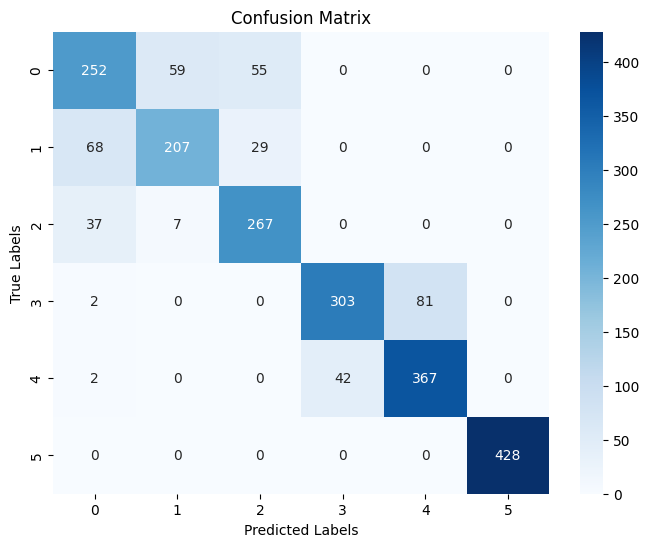

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_valid, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


/Users/roshank/PycharmProjects/IITGNSelectionTask-1/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 50, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 25, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 13, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        89,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,174 (473.34 KB)

 Trainable params: 121,174 (473.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4177 - loss: 1.4037 - val_accuracy: 0.7067 - val_loss: 0.7926
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6822 - loss: 0.8273 - val_accuracy: 0.7756 - val_loss: 0.5547
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7244 - loss: 0.6357 - val_accuracy: 0.8083 - val_loss: 0.4722
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7690 - loss: 0.5610 - val_accuracy: 0.8441 - val_loss: 0.4199
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7757 - loss: 0.5248 - val_accuracy: 0.8232 - val_loss: 0.3982
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8000 - loss: 0.4959 - val_accuracy: 0.8441 - val_loss: 0.3735
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8180 - loss: 0.4464 - val_accuracy: 0.8540 - val_loss: 0.3517
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8229 - loss: 0.4437 - val_accuracy: 0.

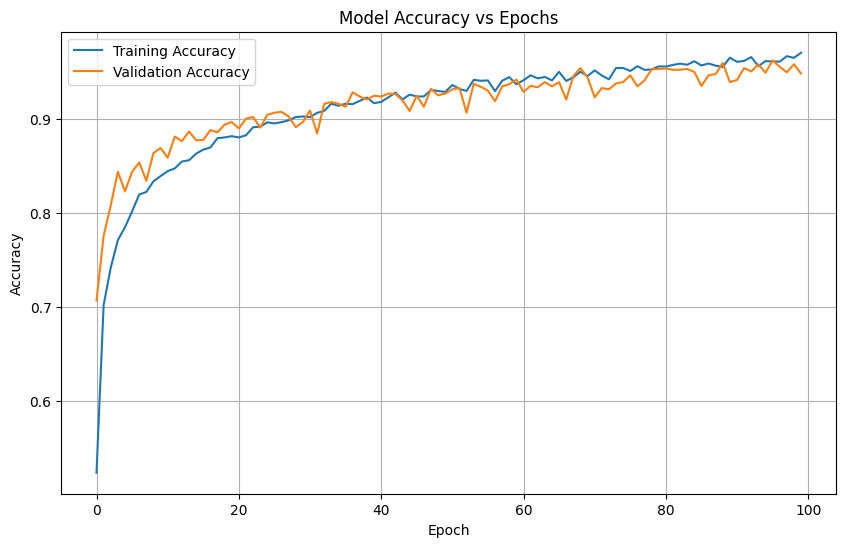

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adamax

seg_len = 50
num_channels = 1
num_labels = 6

model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(seg_len, num_channels), padding='same'),
    MaxPooling1D(pool_size=4, strides=2, padding='same'),

    Conv1D(64, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=4, strides=2, padding='same'),

    Conv1D(128, kernel_size=2, activation='relu', padding='same'),
    MaxPooling1D(pool_size=4, strides=2, padding='same'),

    Flatten(),

    Dense(100, activation='tanh'),
    Dropout(0.5),

    Dense(100, activation='tanh'),
    Dropout(0.5),

    Dense(num_labels, activation='softmax')
])

adamax = Adamax(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=adamax, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    batch_size=128, verbose=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
